<a href="https://colab.research.google.com/github/jacksontenorio8/Inciante_Iris/blob/main/AnaliseDados1_iynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agora vamos fazer a mineração de um texto e extrair palavras chaves:

In [50]:
url= 'https://www.comvest.unicamp.br/vest2023/F2/aprova2/chamada1/geral.html'

Importamos algumas bibliotecas

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



In [52]:
text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!doctype html>
<html><!-- InstanceBegin template="/Templates/inscricao2023.dwt" codeOutsideHTMLIsLocked="false" -->
<head>
<meta charset="utf-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<!-- InstanceBeginEditable name="doctitle" -->
<title>Comiss&atilde;o Permanente para os Vestibulares - Unicamp</title>
<!-- InstanceEndEditable -->
<!-- InstanceBeginEditable name="head" --><!-- InstanceEndEditable -->
<link rel="SHORTCUT ICON" href="/wp-content/uploads/2018/10/comvest.png">
<link href="/css/bootstrap.min.css" rel="stylesheet" type="text/css">
<link href="/css/inscricao2023.css" rel="stylesheet" type="text/css">
</head>

<body onKeyDown="javascript:return trava();">
    <header class="header">
      <div class="logo"> <a href="/"><img id="comvest" src="/wp-content/uploads/2017/03/logo-comvest.png" border="0" alt="P&aacute;gina Inicial" title="P&aacute;gina Inicial"></a> <span></span> <a href="http://www.unicamp.br" target="_blank"><img id="unicamp" src="

Convertemos a linguagem de marcação html em um texto simples usando o objeto HTMLParser. 

In [53]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Comissão Permanente para os Vestibulares - Unicamp  Vestibular 2023  Lista geral de convocados em 1ª chamada - Vestibular 2023 
                    A

 (231002394) Abner Nascimento Ferreira (***)                      Administracao Publica (N)                                             
 (231363110) Adhemar Molon Neto (***)                             Tecnologia em Analise e Des. de Sist. (N)                             
 (231019907) Adilson Pereira de Oliveira Neto                     Educacao Fisica (I)                                                   
 (231449427) Adriano Enrique Silva                                Engenharia Civil (I)                                                  
 (231003984) Adriano Ribeiro Filho (*)                            Educacao Fisica (N)                                                   
 (231478908) Adriano Ribeiro Franulovic Campos                    Engenharia de Computacao (I)                                          
 (231174257) Adriele Letic

Vamos extrair os insights, ou seja as palavras-chave mais significativas usando a biblioteca RAKE. 

In [54]:
import sys
!{sys.executable} -m pip install nlp_rake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Definiremos o comprimento mínimo de uma palavra-chave para 5 caracteres, a frequência mínima de uma palavra-chave no documento para 3 e o número máximo de palavras em uma palavra-chave para 2.

In [55]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('saneamento ambiental', 4.0),
 ('ciencias sociais', 4.0),
 ('fis/fis/fis med', 4.0),
 ('e biomed', 4.0),
 ('artes visuais', 4.0),
 ('ciencias economicas', 4.0),
 ('artes cenicas', 4.0),
 ('estudos literarios', 4.0),
 ('comunicacao social-midialogia', 4.0),
 ('ciencias biologicas', 4.0),
 ('joao pedro', 3.909090909090909),
 ('maria eduarda', 3.8),
 ('educacao fisica', 3.708333333333333),
 ('quimica tecnologica', 3.6527777777777777),
 ('musica popular', 3.611111111111111),
 ('musica erudita', 3.611111111111111),
 ('oliveira silva', 3.6097560975609757),
 ('engenharia mecanica', 3.5159010600706715),
 ('engenharia eletrica', 3.5159010600706715),
 ('engenharia ambiental', 3.5159010600706715),
 ('engenharia agricola', 3.5159010600706715),
 ('engenharia civil', 3.5159010600706715),
 ('administracao publica', 3.325301204819277),
 ('engenharia quimica', 3.168678837848449),
 ('oliveira administracao', 2.935057302380253),
 ('oliveira fonoaudiologia', 2.8240418118466897),
 ('oliveira tecnologia',

In [56]:
!{sys.executable} -m pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


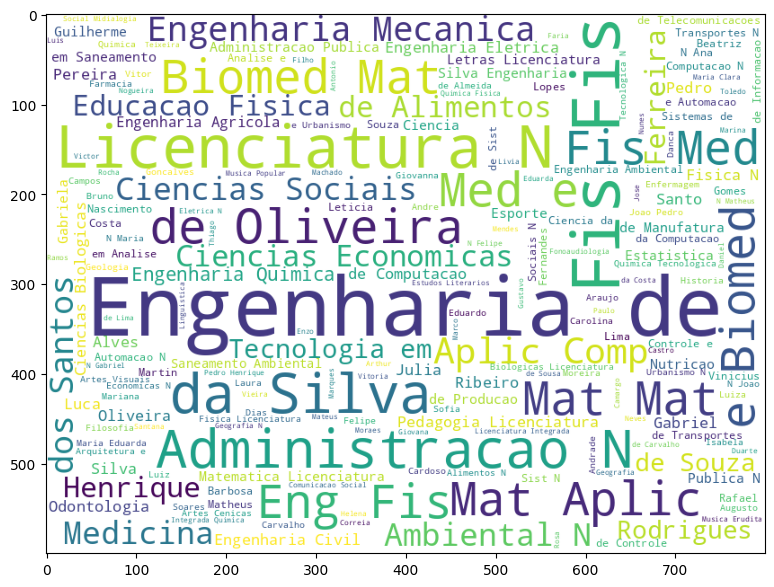

In [57]:


wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))